# Sentiment Classification


### Loading the dataset (5 points)

In [1]:
from keras.datasets import imdb

vocab_size = 10000 #vocab size

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size) # vocab_size is no.of words to consider from the dataset, ordering based on frequency.

Using TensorFlow backend.


In [0]:
from keras.preprocessing.sequence import pad_sequences
vocab_size = 10000 #vocab size
maxlen = 300  #number of word used from each review

## Train test split ( 5 points)

In [0]:
#load dataset as a list of ints
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
#make all sequences of the same length
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test =  pad_sequences(x_test, maxlen=maxlen)

In [4]:
x_train.shape  #number of review, number of words in each review

(25000, 300)

In [0]:
# Taking a look at the review and sentiment
(training_data, training_labels) , (test_data, test_labels) = imdb.load_data(num_words=vocab_size, index_from=3) # we want to assign first three words as three special characters

In [0]:
word_to_id = imdb.get_word_index()
word_to_id = {k:(v+3) for k,v in word_to_id.items()} # shifting the index value by 3
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2

In [7]:
id_to_word = {value:key for key,value in word_to_id.items()}
print(' '.join(id_to_word[id] for id in training_data[6]) )
print('The sentiment is: ',training_labels[6])

<START> lavish production values and solid performances in this straightforward adaption of jane <UNK> satirical classic about the marriage game within and between the classes in <UNK> 18th century england northam and paltrow are a <UNK> mixture as friends who must pass through <UNK> and lies to discover that they love each other good humor is a <UNK> virtue which goes a long way towards explaining the <UNK> of the aged source material which has been toned down a bit in its harsh <UNK> i liked the look of the film and how shots were set up and i thought it didn't rely too much on <UNK> of head shots like most other films of the 80s and 90s do very good results
The sentiment is:  1


In [0]:
# Here is a positive review , from 6th number in training set

## Build Keras Embedding Layer Model (30 points)
We can think of the Embedding layer as a dicionary that maps a index assigned to a word to a word vector. This layer is very flexible and can be used in a few ways:

* The embedding layer can be used at the start of a larger deep learning model. 
* Also we could load pre-train word embeddings into the embedding layer when we create our model.
* Use the embedding layer to train our own word2vec models.

The keras embedding layer doesn't require us to onehot encode our words, instead we have to give each word a unqiue intger number as an id. For the imdb dataset we've loaded this has already been done, but if this wasn't the case we could use sklearn [LabelEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).

In [0]:
import time
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding
from keras.layers import LSTM, TimeDistributed

In [10]:
model = Sequential()
model.add(Embedding(10000 , 8, input_length=maxlen)) # 1000 for vocab size , 8 for dimensionality of embedding
model.add(LSTM(64,activation='relu',return_sequences=True))
model.add(TimeDistributed(Dense(100)))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam', loss = 'binary_crossentropy' , metrics=['acc'])
model.summary()






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 8)            80000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 300, 64)           18688     
_________________________________________________________________
time_distributed_1 (TimeDist (None, 300, 100)          6500      
_________________________________________________________________
flatten_1 (Flatten)          (None, 30000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 250)               7500250   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 251       
Total params: 7,605,6

In [11]:
x_train.shape #number of examples , number of words

(25000, 300)

In [12]:
x_train[1] # words are represented by numbers

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    1,  194, 1153,  194, 8255,   78,  228,    5,    6, 1463,
       4369, 5012,  134,   26,    4,  715,    8,  118, 1634,   14,  394,
         20,   13,  119,  954,  189,  102,    5,  207,  110, 3103,   21,
         14,   69,  188,    8,   30,   23,    7,   

In [0]:
# We have some pad sequence so if the length is not 300 it will pad it with zeros also start of the sequence is 1 as expected from the network to understand

In [14]:
y_train.shape

(25000,)

In [15]:
x_test[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    1,   14,   22, 3443,
          6,  176,    7, 5063,   88,   12, 2679,   23, 1310,    5,  109,
        943,    4,  114,    9,   55,  606,    5,  111,    7,    4,  139,
        193,  273,   23,    4,  172,  270,   11, 7216,    2,    4, 8463,
       2801,  109, 1603,   21,    4,   22, 3861,    8,    6, 1193, 1330,
         10,   10,    4,  105,  987,   35,  841,    2,   19,  861, 1074,
          5, 1987,    2,   45,   55,  221,   15,  670, 5304,  526,   14,
       1069,    4,  405,    5, 2438,    7,   27,   85,  108,  131,    4,
       5045, 5304, 3884,  405,    9, 3523,  133,    5,   50,   13,  104,
         51,   66,  166,   14,   22,  157,    9,    4,  530,  239,   34,
       8463, 2801,   45,  407,   31,    7,   41, 37

In [0]:
# Again as expected the padding is done with zeros and the start of the sequence is successfully understood as 1 by the network

In [17]:
start = time.clock()
history = model.fit(x_train , y_train, epochs=5, batch_size=500, validation_data=(x_test,y_test))
end  = time.clock()
print('Duration taken: ',end-start,' secs')




Train on 25000 samples, validate on 25000 samples
Epoch 1/5





25000/25000 [==============================] - 35s 1ms/step - loss: 0.5947 - acc: 0.6494 - val_loss: 0.4630 - val_acc: 0.7815
Epoch 2/5
25000/25000 [==============================] - 33s 1ms/step - loss: 0.3063 - acc: 0.8704 - val_loss: 0.3080 - val_acc: 0.8658
Epoch 3/5
25000/25000 [==============================] - 32s 1ms/step - loss: 0.2243 - acc: 0.9119 - val_loss: 0.3259 - val_acc: 0.8644
Epoch 4/5
25000/25000 [==============================] - 33s 1ms/step - loss: 0.1697 - acc: 0.9375 - val_loss: 0.3180 - val_acc: 0.8709
Epoch 5/5
25000/25000 [==============================] - 33s 1ms/step - loss: 0.1349 - acc: 0.9514 - val_loss: 0.3780 - val_acc: 0.8598
Duration taken:  242.646713  secs


In [18]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


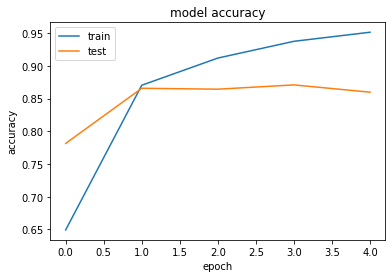

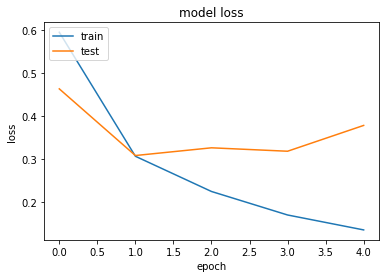

In [19]:
from matplotlib import pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
model.layers # get all layers from model

## Accuracy of the model  & Retrive the output of each layer in keras for a given single test sample from the trained model you built (10 Points)

In [21]:
score = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 131s 5ms/step


In [22]:
model.metrics_names

['loss', 'acc']

In [23]:
score

[0.3780007284164429, 0.8598]

In [24]:
print('Test Accuracy: %.2f%%' %(score[1]*100))

Test Accuracy: 85.98%


In [25]:
model.layers[0].output

<tf.Tensor 'embedding_1/embedding_lookup/Identity:0' shape=(?, 300, 8) dtype=float32>

In [0]:
# Retrieving output of each layer in keras for a given test sample
test_sample = 11

In [27]:
import numpy as np
round(float(model.predict(np.array([x_test[test_sample],]))))

0

In [28]:
y_test[11]

0

In [0]:
# We see that predicted and expected values are same for the given test sample

In [30]:
from keras import backend as k

inp = model.input # input placeholder
outputs = [layer.output for layer in model.layers] # all layer outputs
functors = [k.function([inp, k.learning_phase()], [out]) for out in outputs] # evaluation function

# Testing
test = np.array([x_test[test_sample],])
layer_outs = [func([test,1]) for func in functors] # we want to simulate dropout layer hence chose 1
print(len(layer_outs[0][0][0][0]))
print(layer_outs) # Getting the output of all the layers


8
[[array([[[-0.00821249, -0.02743134, -0.04032865, ..., -0.02302344,
          0.0156406 , -0.01921797],
        [-0.00821249, -0.02743134, -0.04032865, ..., -0.02302344,
          0.0156406 , -0.01921797],
        [-0.00821249, -0.02743134, -0.04032865, ..., -0.02302344,
          0.0156406 , -0.01921797],
        ...,
        [-0.0102319 , -0.01709338,  0.0680077 , ..., -0.01360554,
          0.04824011,  0.04628466],
        [ 0.03186453, -0.03627975, -0.05268579, ..., -0.09924363,
         -0.05713877,  0.09345388],
        [ 0.01419222, -0.00166997, -0.05309185, ...,  0.03307606,
          0.01536513,  0.01370452]]], dtype=float32)], [array([[[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        

In [31]:
# Checking user created sentiment

from keras.preprocessing import sequence

bad = "this was a poor and terrible movie"
good = "this movie was awesome"
sarcasm = "go and watch this movie if you have enough time"
for review in [good,bad,sarcasm]:
  tmp = []
  for word in review.split(" "):
    tmp.append(word_to_id[word])
  tmp_padded = sequence.pad_sequences([tmp], maxlen=300)

  print("%s. Sentiment: %s" % (review,model.predict(np.array([tmp_padded][0]))[0][0]))
  print("%s. Sentiment: %s" % (review,model.predict_classes(np.array([tmp_padded][0]))[0][0]))

this movie was awesome. Sentiment: 0.50461984
this movie was awesome. Sentiment: 1
this was a poor and terrible movie. Sentiment: 0.03218486
this was a poor and terrible movie. Sentiment: 0
go and watch this movie if you have enough time. Sentiment: 0.32258764
go and watch this movie if you have enough time. Sentiment: 0


### Conclusion ###

IMDB dataset containing 25,000 movies where reviews labeled by sentiment (positive/negative). A sequential model is built on this dataset using keras for sentiment analysis. The model is trained with 5 epochs and is having an accuracy of 86%. It has correctly predicted the sentiment for the sample review. Also we checked our model with three types of user created reviews good, bad and sarcasm. For each cases our model has perfectly predicted the sentiment.